In [1]:
using DataFrames
using DataFramesMeta
using CSV


In [256]:
df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S1_TEX.dat", DataFrame)
#df = pd.read_csv(r'/Users/royj/development/LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat')
#df = pd.read_csv(r'\\trllimited\data\INF_TRACS\TRACS5\1 - Accreditation\RAV17\5-Accreditation-May23\CC Output\TRACS4\Plates\Texture\RAV17_NS_Run_1_A.dat')
# df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\PTS\MFV1 resubmission\ProfileMats\LONG-PM-NS-R2_rcd_AB1_tex.dat')
#df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\PTS\MFV2 sumbission2\ProfileMats\LONG-PM-NS-R1_AB1_tex.dat')
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest4\\PM_Long\\NS\\T4_20230524_094145_GLUK_RCD_L1AB_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest3\\PM_Long\\NS\\T3_20230524_094200_GLUK_RCD_tex.dat", DataFrame)

Row,Chainage,Texture,Dropout
,Float64,Float64,Int64
1,0.000343596,-33.8,0
2,0.00133793,-32.8,0
3,0.00233227,-32.8,0
4,0.00332661,-32.7,0
5,0.00432095,-32.4,0
6,0.00531529,-32.1,0
7,0.00630962,-32.3,0
8,0.00730396,-32.4,0
9,0.0082983,-31.9,0


In [257]:
minimum_texture = minimum(df.Texture)

adjustment_value = abs(minimum_texture)

#df.adjusted_Tex = df.Texture + adjustment_value
#df.adjusted_Tex = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

readings_per_metre = length(df.Chainage) / maximum(df.Chainage)
println("readings per metre ", readings_per_metre)
hertz = readings_per_metre/2
println("hertz ", hertz)

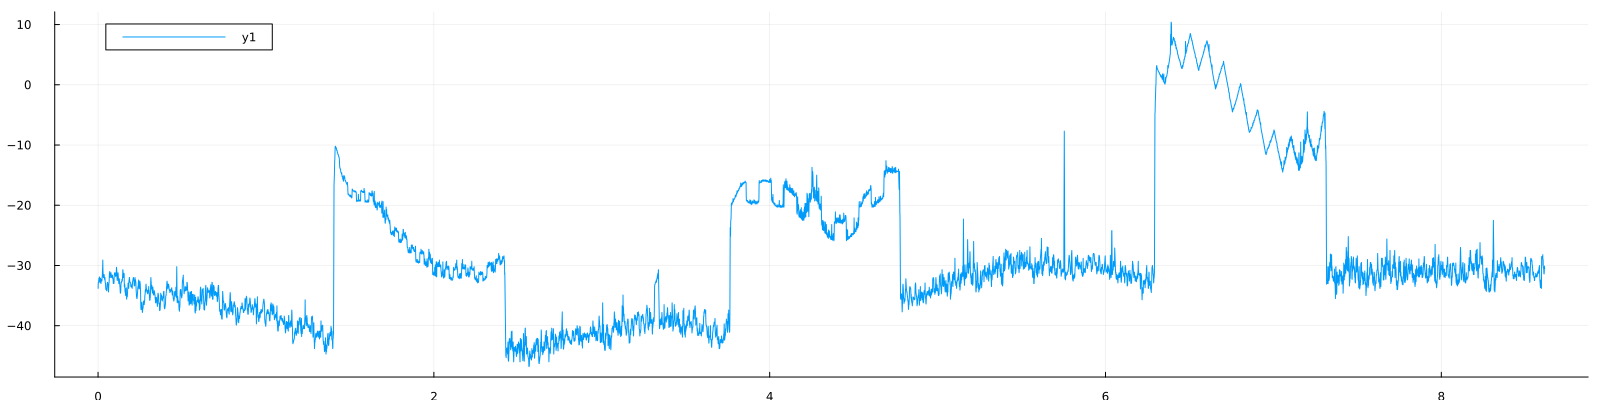

In [258]:
using Plots

#plotattr(size=(1200,400))
plot(df.Chainage
    , df.Texture
    , size=(1600,400))

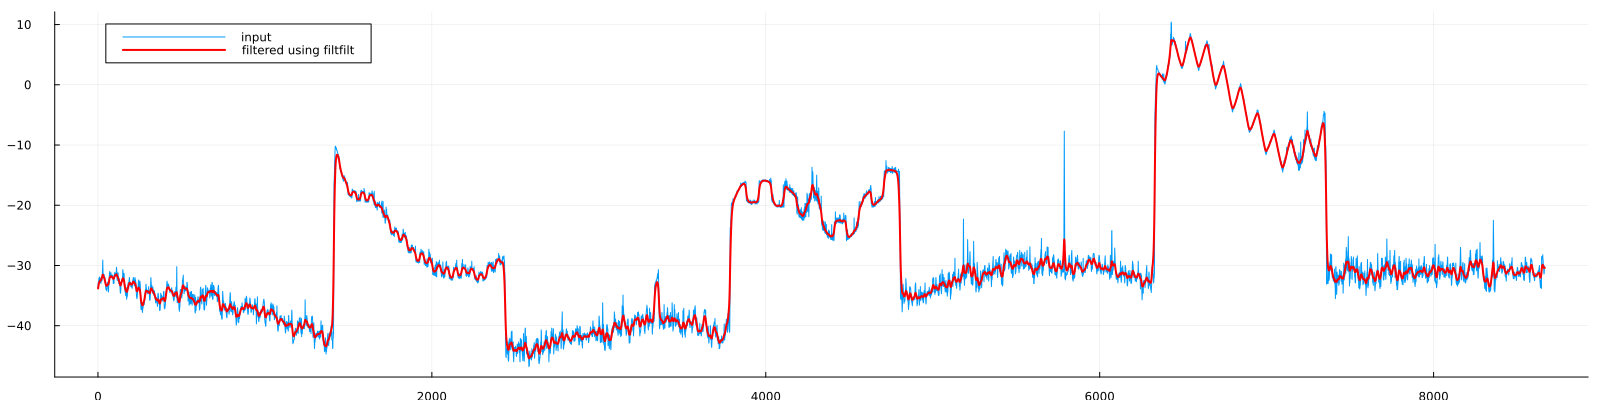

In [259]:
using DSP, Plots
t = 1:1000; fs =2000; f0 = 60  # sampling and cutoff frequencies
rawdata = df.Texture
data_filt = filtfilt(digitalfilter(Lowpass(f0, fs=fs), Butterworth(1)), rawdata)
plot(rawdata,label="input")
plot!(data_filt, lc=:red, lw=2,label="filtered using filtfilt", size=(1600,400))

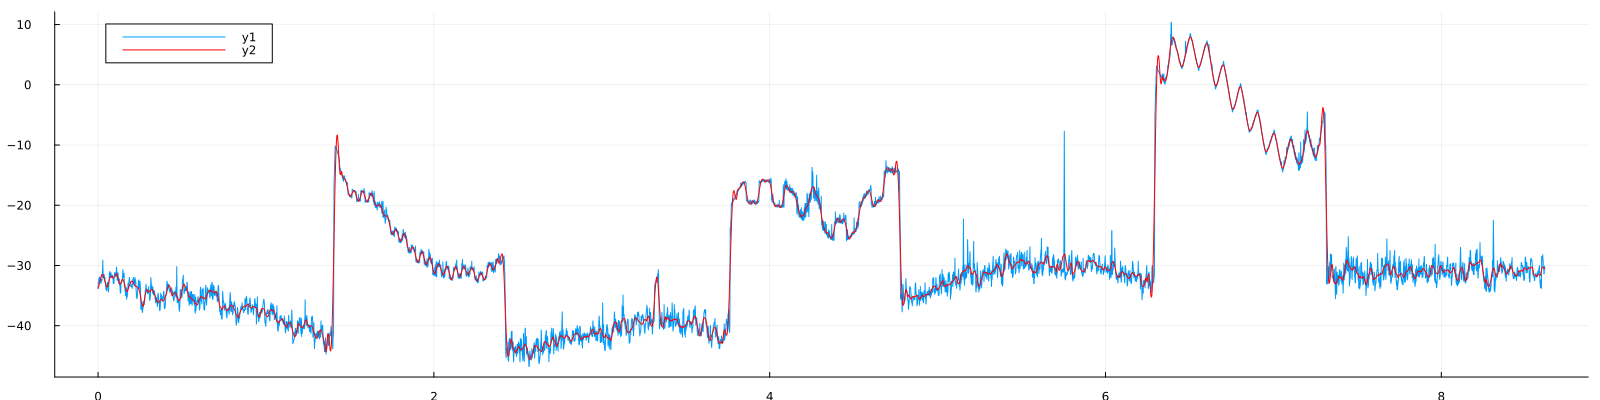

In [260]:
using SavitzkyGolay

# from matplotlib import pyplot as plt
# import matplotlib as mpl
#sg = savitzky_golay(y::AbstractVector, window_size::Int, order::Int; deriv::Int=0, rate::Real=1.0)

sg = savitzky_golay(df.Texture, 99, 6) 

# print(len(df.Chainage))
# plt.subplots(figsize=(20,5))
# plt.plot(df.Chainage, df.Texture)
#plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))
plot(df.Chainage,df.Texture,size=(1600,400))
plot!(df.Chainage, sg.y,lc=:red)

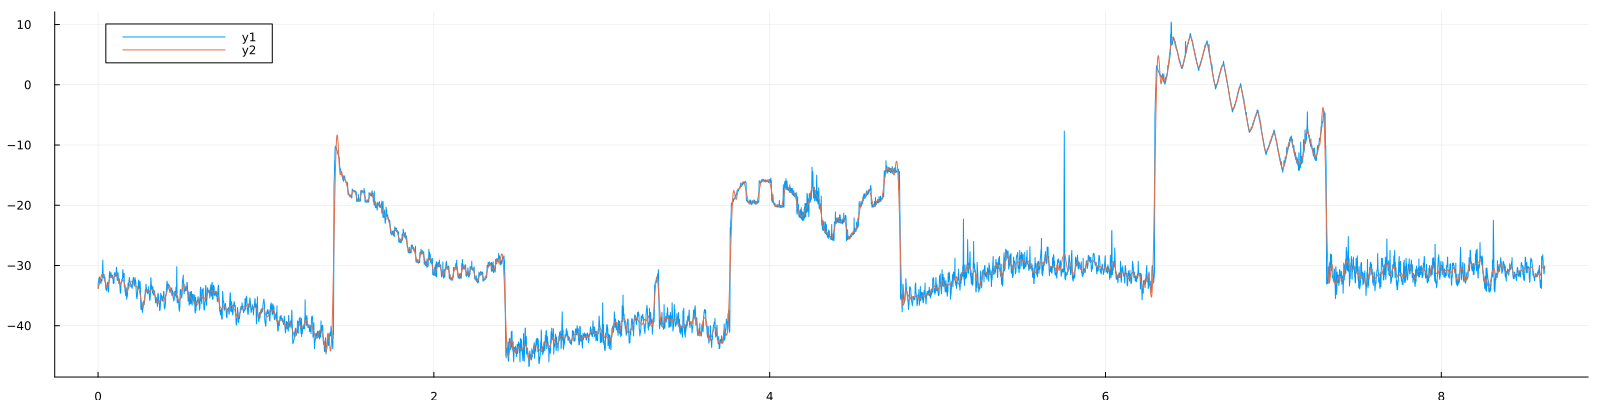

In [261]:
plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))

In [262]:
filtered_tex = sg.y
df.sg = sg.y

8666-element Vector{Float64}:
 -33.80000024452683
 -33.712333014963946
 -33.61470224614249
 -33.51349171556918
 -33.41613424526809
 -33.31612848959967
 -33.215026910084084
 -33.10093306574421
 -32.97999462836266
 -32.86187589236078
   ⋮
 -30.313280424675405
 -30.336391295394616
 -30.367410944606885
 -30.3949543089267
 -30.420577100506353
 -30.441477312564096
 -30.463278027011825
 -30.47640917213119
 -30.5000009691572

In [263]:
# Need to figure out where the input signal increases or decreases by a significant value, find the absolute change between the data readings.
# create abs_data_diff

using ShiftedArrays: lead
df_diff_calc = transform(df, :sg => (x -> x - lead(x,3)) => :data_diff)
transform!(df_diff_calc, :data_diff => (ByRow(x -> abs(x)) => :abs_data_diff))


Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64?
1,0.000343596,-33.8,0,-33.8,-0.286509,0.286509
2,0.00133793,-32.8,0,-33.7123,-0.296199,0.296199
3,0.00233227,-32.8,0,-33.6147,-0.298574,0.298574
4,0.00332661,-32.7,0,-33.5135,-0.298465,0.298465
5,0.00432095,-32.4,0,-33.4161,-0.315201,0.315201
6,0.00531529,-32.1,0,-33.3161,-0.336134,0.336134
7,0.00630962,-32.3,0,-33.215,-0.353151,0.353151
8,0.00730396,-32.4,0,-33.1009,-0.372125,0.372125
9,0.0082983,-31.9,0,-32.98,-0.394452,0.394452


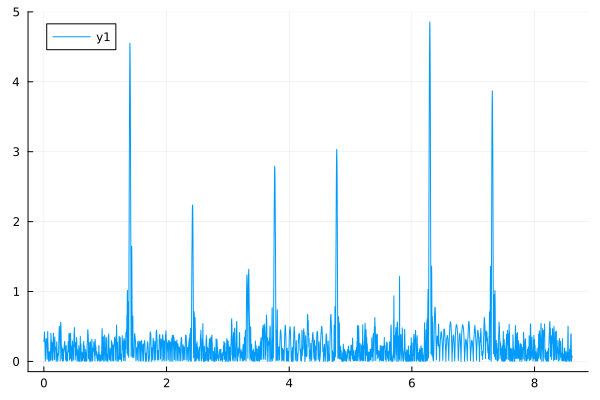

In [264]:
plot(df_diff_calc.Chainage, df_diff_calc.abs_data_diff)


In [265]:
threshold = 1.5  # Given threshold
exceed_points = Int[]
@transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))
prev_val = df_diff_calc[1, :abs_data_diff]

for i in 1:5:length(df_diff_calc[!,:abs_data_diff])
    
    current_val = df_diff_calc[i, :abs_data_diff]

    if current_val > threshold
        push!(exceed_points, i)
    end

end

println("Points at which the difference in values exceeds $threshold: are $exceed_points")

In [266]:
#println(exceed_points)

plate_boundaries = []
differences = diff(exceed_points)
#plate_start = exceed_points[1]

for i in 1:length(differences)
    if differences[i] > 90 && differences[i] <= 1100
        push!(plate_boundaries, exceed_points[i])
        push!(plate_boundaries, exceed_points[i+1])
        #plate_start=0
    end
end

print(plate_boundaries)

In [267]:
# # This time remove the points that are within 900 of the previous value

# plate_edges = Any[]
# last_plate_end = 0
# previous_val = 0

# for i in 1:length(exceed_points)

#     current_val = exceed_points[i]
#     # println(current_val)

#     #plate_complete = false

#     if i != 1 
#         #print(length(plate_edges))
#         #flush(stdout)
#         if (current_val - last_plate_end) > 1000
#             #if (current_val - last_plate_end) > 2000
#             println("previous_val ", previous_val)
#             if (current_val - previous_val) >= 100 #&& 
#             #(current_val - last_plate_end) > 1000 # ||
#            # last_plate_end == 0 # (current_val - previous_val) >= 1000 # iseven(length(plate_edges)) #&& plate_complete == false
            
            
            
#                 push!(plate_edges, previous_val)
#                 push!(plate_edges, current_val)
#                 global last_plate_end = current_val
#                 println("last_plate_end ", last_plate_end)
#             #previous_val = 1000
#             #plate_complete = true
#         #elseif 
#             #previous_val = current_val
#             #plate_complete =false
#             end
#         end
#         previous_val = current_val
#     else

#         # push!(plate_edges, current_val)
#         #global previous_val = current_val
#         previous_val = exceed_points[i]
#         #previous_val = current_val

#     end

#     previous_val = current_val

# end

# println(plate_edges)

In [268]:
# println(plate_edges)

# plate_boundaries = []

# differences = plate_edges[2:end] .- plate_edges[1:end-1]
# println(differences)
# # plate_edges = exceed_points .>= 100
# plate_start = plate_edges[1]

# for i in 1:length(differences)
#     if differences[i] > 90 && differences[i] <= 1000
#         push!(plate_boundaries, plate_edges[i])
#         push!(plate_boundaries, plate_edges[i+1])
#         #global last_plate_end = current_val
#         println("plate_edges ", plate_edges[i], " ", plate_edges[i+1])
#         plate_start=0

# #         println(exceed_points[i])
#     end
# end

# print(plate_boundaries)

In [269]:
# # This time remove the points that are within 900 of the previous value

# plate_edges = Any[]
# last_plate_end = 0
# previous_val = 0
# next_plate = false

# for i in 1:length(exceed_points)

#     current_val = exceed_points[i]
#     # println(current_val)

#     #plate_complete = false

#     if i != 1
#         #current_val = exceed_points[i]
#         #print(length(plate_edges))
#         #flush(stdout)
#         if ((current_val - previous_val) < 100) # || (previous_val != 0)
#             #previous_val = current_val
#         #else
#             if (current_val - previous_val) > 800
#         #     ((current_val - last_plate_end) >= 1000) #&& next_plate == true
#         #     #if (current_val - last_plate_end) > 2000
#         #     global next_plate = false
#         #     println("current ", current_val, " previous_val ", previous_val, " next_plate ", next_plate)
#         #    # && (current_val - last_plate_end) >= 1000 #&& 
#         #     #(current_val - last_plate_end) > 1000 # ||
#         #    # last_plate_end == 0 # (current_val - previous_val) >= 1000 # iseven(length(plate_edges)) #&& plate_complete == false
            
#                 push!(plate_edges, previous_val)
#                 push!(plate_edges, current_val)
#                 global last_plate_end = current_val
#                 println("last_plate_end ", last_plate_end)
#         #         global next_plate=true
#         #     #previous_val = 1000
#         #     #plate_complete = true
#         # #elseif 
#         #     #previous_val = current_val
#         #     #plate_complete =false
#             end
#         # end
#         previous_val = current_val
#     else

#         # push!(plate_edges, current_val)
#         #global previous_val = current_val
#         previous_val = exceed_points[i]
#         #previous_val = current_val
#         end
#     end

#     #previous_val = current_val

# end

#println(plate_edges)

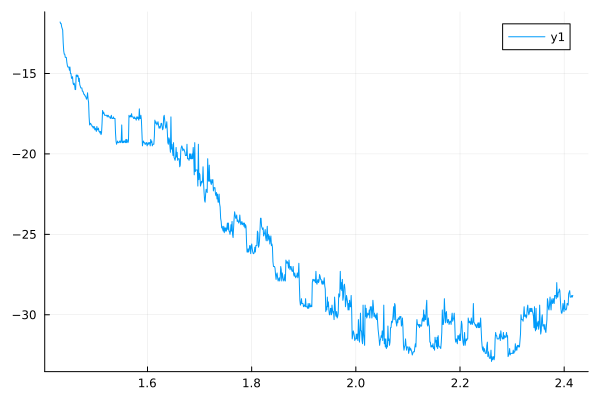

In [270]:

plate1 = df_diff_calc[plate_boundaries[1]:plate_boundaries[2],:]

plot(plate1.Chainage, plate1.Texture)

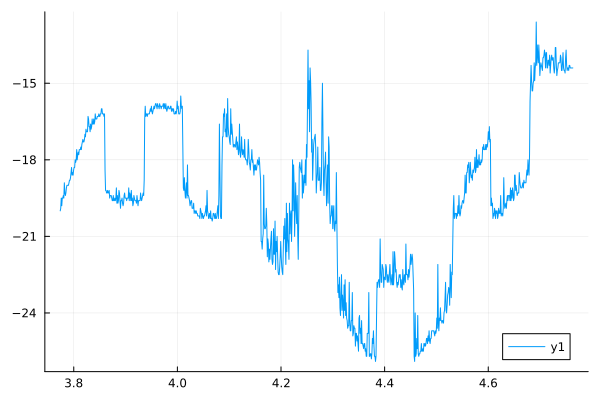

In [271]:
plate2 = df_diff_calc[plate_boundaries[3]:plate_boundaries[4],:]

plot(plate2.Chainage, plate2.Texture)

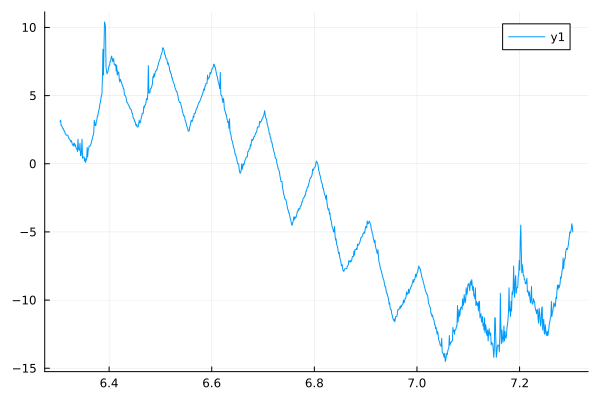

In [272]:
plate3 = df_diff_calc[plate_boundaries[5]:plate_boundaries[6],:]

plot(plate3.Chainage, plate3.Texture)

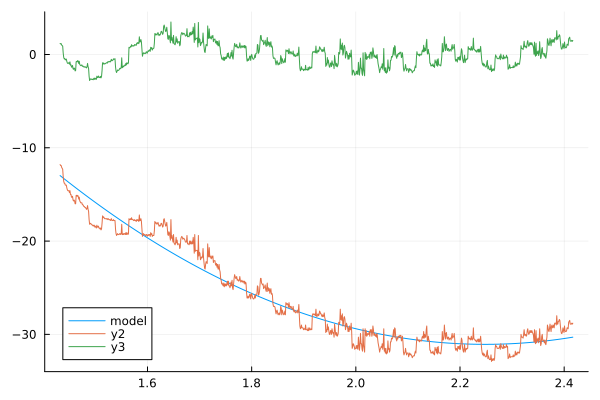

In [273]:
# find the regression line for plate 1
using GLM
model = lm(@formula(Texture ~ 1 + Chainage + Chainage^2), plate1)  # Note how the formula looks exactly like the model you want to build
plot(plate1.Chainage, predict(model, plate1), label="model")
plot!(plate1.Chainage, plate1.Texture)

plate1.baseline = predict(model,plate1)

plate1.corrected = plate1.Texture - plate1.baseline

plot!(plate1.Chainage, plate1.corrected)


In [274]:
plate1_average = mean(plate1.corrected)
println(plate1_average)
#calculate the mean values of the corrected values above the mean

mean_above_average = mean(plate1[plate1[!,:corrected].>plate1_average,:].corrected)
println(mean_above_average)
#plate1[plate1[!,:corrected].>plate1_average,:]
mean_below_average = mean(plate1[plate1[!,:corrected].<plate1_average,:].corrected)
print(mean_below_average)

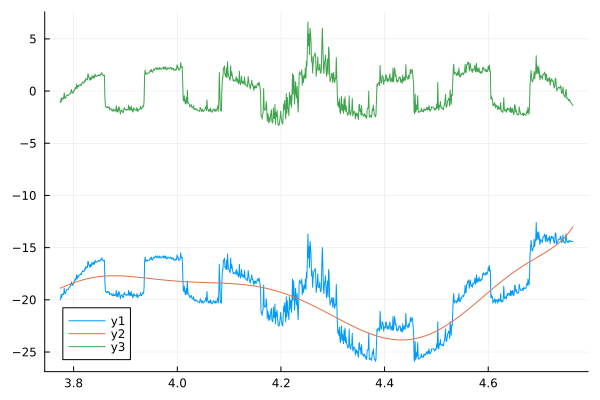

In [304]:
poly = curve_fit(Polynomial, plate2.Chainage, plate2.Texture, 8)
plate2.basepoly = poly.(plate2.Chainage)

plate2.corrected = plate2.Texture - plate2.basepoly

plot(plate2.Chainage, plate2.Texture)
plot!(plate2.Chainage, plate2.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate2.Chainage, plate2.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

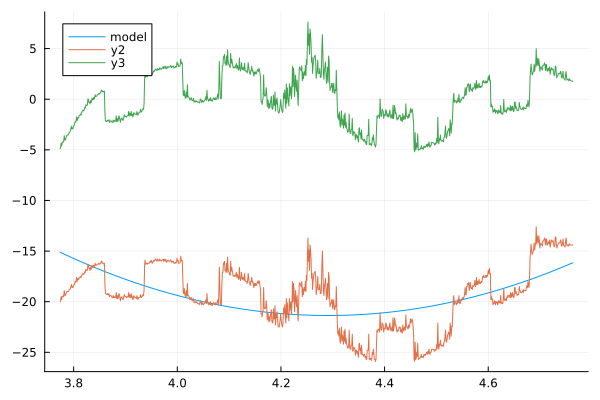

In [275]:
model = lm(@formula(Texture ~ 1 + Chainage + Chainage^2), plate2)  # Note how the formula looks exactly like the model you want to build
plot(plate2.Chainage, predict(model, plate2), label="model")
plot!(plate2.Chainage, plate2.Texture)

plate2.baseline = predict(model,plate2)

plate2.corrected = plate2.Texture - plate2.baseline

plot!(plate2.Chainage, plate2.corrected)

In [302]:
# find the average of the corrected data
using Statistics
plate2_average = mean(plate2.corrected)
println(plate2_average)
#calculate the mean values of the corrected values above the mean

mean_above_average = mean(plate2[plate2[!,:corrected].>plate2_average,:].corrected)
println(mean_above_average)
#plate1[plate1[!,:corrected].>plate1_average,:]
mean_below_average = mean(plate2[plate2[!,:corrected].<plate2_average,:].corrected)
print(mean_below_average)

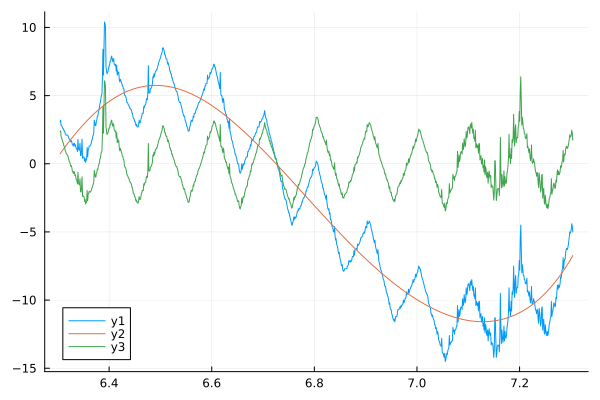

In [297]:
using CurveFit

poly = curve_fit(Polynomial, plate3.Chainage, plate3.Texture, 7)
plate3.basepoly = poly.(plate3.Chainage)

# exp = curve_fit(ExpFit, plate3.Chainage, plate3.Texture)
# plate3.baseexp = exp.(plate3.Chainage)



#plate3.baseline = predict(model,plate3)

plate3.corrected = plate3.Texture - plate3.basepoly
#plate3.expcorrected = plate3.Texture - plate3.baseexp

plot(plate3.Chainage, plate3.Texture)
plot!(plate3.Chainage, plate3.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate3.Chainage, plate3.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [298]:
using Statistics
plate3_average = mean(plate3.corrected)
println(plate3_average)
flush(stdout)
#calculate the mean values of the corrected values above the mean

mean_above_average = mean(plate3[plate3[!,:corrected].>plate3_average,:].corrected)
println(mean_above_average)
flush(stdout)
#plate1[plate1[!,:corrected].>plate1_average,:]
mean_below_average = mean(plate3[plate3[!,:corrected].<plate3_average,:].corrected)
print(mean_below_average)
flush(stdout)

mean_above_average

1.5657037928962068

In [299]:
plate3_average

1.783081964659225e-7

In [300]:
mean_below_average

-1.4927386076388196

In [280]:
@transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))

df_diff_calc

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,0.000343596,-33.8,0,-33.8,-0.286509,0.286509
2,0.00133793,-32.8,0,-33.7123,-0.296199,0.296199
3,0.00233227,-32.8,0,-33.6147,-0.298574,0.298574
4,0.00332661,-32.7,0,-33.5135,-0.298465,0.298465
5,0.00432095,-32.4,0,-33.4161,-0.315201,0.315201
6,0.00531529,-32.1,0,-33.3161,-0.336134,0.336134
7,0.00630962,-32.3,0,-33.215,-0.353151,0.353151
8,0.00730396,-32.4,0,-33.1009,-0.372125,0.372125
9,0.0082983,-31.9,0,-32.98,-0.394452,0.394452


In [281]:
threshold = 1.5 # Given threshold
exceed_points = [] # will be a list of rows near the edges of the plate.


prev_val = df_diff_calc[1,:abs_data_diff]
end_of_df = length(df_diff_calc[!,:abs_data_diff])
println("end ",end_of_df)
println("first previous ",prev_val)
@transform(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 0))
#loop_range = range(1, 15, end_of_df)
# outer loop means that only the row numbers vivisable by 15 are processed
for i in 1:end_of_df
  # current_val = df.iloc[i]['Texture'] 
  if i % 12 == 0
    #println("pos ", i)
  
  #int_i = 
  
  current_val = df_diff_calc[i, :abs_data_diff]
  print(current_val)
    if abs(current_val - prev_val) > threshold
      append!(exceed_points, i)
      #i= i + 700
      prev_val = current_val
    #
    end
  end
end
println("Points at which the difference in values exceeds $threshold are $exceed_points")

In [282]:
threshold = 22 # Given threshold
exceed_points = []

prev_val = df[1,:Texture]
end_of_df = length(df[!,:Texture])
println("end ",end_of_df)
println("first tex ",prev_val)
#loop_range = range(1, 15, end_of_df)
# outer loop means that only the row numbers vivisable by 15 are processed
for i in 1:end_of_df
  # current_val = df.iloc[i]['Texture'] 
  if i % 12 == 0
    #println("pos ", i)
  
  #int_i = 
  
  current_val = df[i, :Texture]
    if abs(current_val - prev_val) > threshold
      append!(exceed_points, i)
      #i= i + 700
      prev_val = current_val
    #
    end
  end
end
println("Points at which the difference in values exceeds $threshold are $exceed_points")

In [283]:
# return the rows where the difference is greater than a given value

potential_plates = subset(df_diff_calc, :abs_data_diff => ByRow(abs_data_diff -> abs_data_diff > 2), skipmissing=true)
#
#textureΔ =
#mapcols(data_diff -> df_diff_calc)

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,1.39043,-40.5,0,-42.6174,-2.06273,2.06273
2,1.39142,-41.7,0,-42.0213,-2.35472,2.35472
3,1.39242,-42.3,0,-41.3433,-2.65431,2.65431
4,1.39341,-42.3,0,-40.5547,-2.93787,2.93787
5,1.39441,-42.4,0,-39.6666,-3.19245,3.19245
6,1.3954,-42.4,0,-38.689,-3.41923,3.41923
7,1.39639,-43.0,0,-37.6168,-3.61832,3.61832
8,1.39739,-43.8,0,-36.4741,-3.79508,3.79508
9,1.39838,-43.7,0,-35.2698,-3.96093,3.96093


In [284]:
print("fred")

In [285]:
#length_of_df = length(potential_plates[!,1])
length_of_df = length(df_diff_calc[!,1])
println(length_of_df)
df_diff_calc.data_diff[ismissing.(df_diff_calc.data_diff)] .= 0

# global df_diff_calc
i=1
# global plate_start =1
# global plate_end= 2
# global plate_position = 1

while i <= length_of_df

    println(i)
    #plate_position = i
    #plate_start=1
    #plate_end=1
    abs_data_diff = df_diff_calc[i,:abs_data_diff]
    #int_data_diff: Float64 = df_diff_calc[i,:data_diff]
    int_data_diff = df_diff_calc[i,:data_diff]
    #println(plate_position) # , "DATA DIFF ",int_data_diff)

    if ismissing(int_data_diff) int_data_diff = 0 end

    print(int_data_diff)

    if int_data_diff <= -2.0
        plate_start = i
        println("row ", i, " data_diff ",int_data_diff)
        i = i + 800
    # else
    #     i+=1
        #continue
    end

    # if int_data_diff >= 2
    #     plate_end = i
    #     i =i +1000
    #     println( "start ", plate_start)
    #     println("End ", plate_end)
    # end
    global i +=1
    
end


In [286]:
while i <= 3
    println(i)
    global i += 1
end
println(i)

In [287]:
i=1

while i <= 3
    println(i)
    global i += 1
end
println(i)

In [288]:
length_of_df

8666

In [289]:
df_diff_calc

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,0.000343596,-33.8,0,-33.8,-0.286509,0.286509
2,0.00133793,-32.8,0,-33.7123,-0.296199,0.296199
3,0.00233227,-32.8,0,-33.6147,-0.298574,0.298574
4,0.00332661,-32.7,0,-33.5135,-0.298465,0.298465
5,0.00432095,-32.4,0,-33.4161,-0.315201,0.315201
6,0.00531529,-32.1,0,-33.3161,-0.336134,0.336134
7,0.00630962,-32.3,0,-33.215,-0.353151,0.353151
8,0.00730396,-32.4,0,-33.1009,-0.372125,0.372125
9,0.0082983,-31.9,0,-32.98,-0.394452,0.394452
